# Working with DataFrames & Series - indexes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,Ankara ekspresi,1952
1,"Ans Vaterland, ans teure",1915
2,Miss Mohini,2002
3,La vera madre,1999
4,O Amerikanos,1993


In [3]:
%time
cast = pd.read_csv('data/cast.csv')
cast.head()

Wall time: 0 ns


,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [4]:
# When I do something like this I am asking the question 3.7 million times
%time
cast[cast.title == 'Sleuth']

Wall time: 0 ns


,title,year,name,type,character,n
238747,Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
299291,Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
299292,Sleuth,2007,Michael Caine,actor,Andrew,1.0
342151,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
342152,Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
1183659,Sleuth,2007,Jude Law,actor,Milo,2.0
1325945,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0
1341313,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
1560814,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0
1652936,Sleuth,2007,Harold Pinter,actor,Man on T.V.,3.0


In [5]:
# iloc vs loc

In [6]:
c = cast.set_index(['title'])
c.head()

,year,name,type,character,n
title,,,,,
Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
Suuri illusioni,1985,Homo $,actor,Guests,22.0
Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [7]:
%time
c.loc['Sleuth'].head()

Wall time: 0 ns


,year,name,type,character,n
title,,,,,
Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
Sleuth,2007,Michael Caine,actor,Andrew,1.0
Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN


In [160]:
# indexes are better if they are ordered
# index takes time to build but after that it operates much faster
# when I do this Python uses a different method of finding -does not do it
# 3.7 million times
c = cast.set_index(['title']).sort_index()
c.head()

In [ ]:
%time
c.loc['Sleuth']

In [ ]:
c = cast.set_index(['title', 'year']).sort_index()
c.head()

In [ ]:
%time
c.loc['The Wizard of Oz'].head()

In [ ]:
c.loc['Sleuth'].loc[1972]

In [ ]:
c.loc['Sleuth', 1972]

In [ ]:
# if you need to remove
c.loc['Sleuth', 1972].reset_index('year')

In [ ]:
c.loc['Sleuth', 1972].reset_index(['title','year'])

In [62]:
# groupby
c.reset_index(inplace=True)

In [162]:
# have to use an aggregator, first, last, sum, size, etc
cast = pd.read_csv('data/cast.csv')
c = cast[cast.name == 'Natalie Portman'] 
c.head()

In [163]:
# spits out a series --> whatever you group on becomes the index
c.sort_values(by='year').groupby(['year', 
                                  'title', 'character']).first().head()

In [ ]:
c.sort_values(by='year').groupby(['year']).size()

In [ ]:
c.sort_values(by='year').groupby(['year']).size().plot(kind='bar');

In [ ]:
c.sort_values(by='year').groupby(['year']).size().plot(style='^');

In [98]:
c.sort_values(by='year').groupby(['year']).n.max().sort_values().head()

year
2000    1.0
2008    1.0
2006    2.0
2013    2.0
2002    2.0
Name: n, dtype: float64

In [94]:
# can group by an expression (may be better to group on column name)
c.groupby(c.year // 10 * 10).size()

year
1990    13
2000    20
2010    10
dtype: int64

In [102]:
c = cast
c.groupby([c.year // 10 * 10, 'type']).size()

In [157]:
# Columns are also an index --> unstack and stack for indexing on column
# and unstack(0)
c.groupby([c.year // 10 * 10, 'type']).size().unstack()

In [ ]:
unstacked = c.groupby([c.year // 10 * 10, 'type']).size().unstack()
(unstacked['actress'] / unstacked['actor']).plot(style='o') 

In [156]:
# .fillna(value), i.e. 0
# set ylim later
(unstacked['actor'] - unstacked['actress']).plot(ylim=(-5000,300000)) 

In [38]:
release = pd.read_csv(
    'data/release_dates.csv',
    parse_dates=['date'],
    infer_datetime_format=True,
)
release.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443486 entries, 0 to 443485
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    443486 non-null  object        
 1   year     443486 non-null  int64         
 2   country  443486 non-null  object        
 3   date     443486 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 13.5+ MB


In [155]:
# dayofweek, dayofyear, 
r = release
r.date.dt.day

In [ ]:
# merge --> works easily if you have two columns of the 
# same name (with the same data)
c = cast[cast.name == 'Natalie Portman']
dates = c.merge(r)
dates[dates['country'] == 'USA']

In [ ]:
c = cast[(cast['name'] == 'Natalie Portman') & (cast.n <= 2)]
c = c.merge(cast, on=['title', 'year'])
c = c[c.n_y <= 2]
c[c.name_y != 'Natalie Portman']

# Problems

#### 1. Plot the number of films released each decade over time 

<AxesSubplot:xlabel='year'>

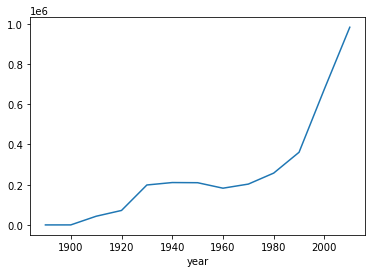

In [10]:
c = cast[cast.year < 2018]
c.groupby(c.year // 10 * 10).size().plot()

#### 2. How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 2000's?

<AxesSubplot:xlabel='year'>

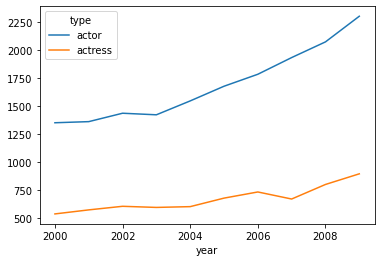

In [13]:
c = cast[(cast.year > 1999) & (cast.year < 2010) & (cast.n == 1)]
c.groupby(['year', 'type']).size().unstack().plot()

#### 3. In the 2000's decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 4?

In [16]:
c = cast[(cast.year > 1999) & (cast.year < 2010) & (cast.n <= 4)]
c.groupby(['type', 'n']).size().unstack('n')

n,1.0,2.0,3.0,4.0
type,,,,
actor,16895,12169,12698,12153
actress,6698,9978,8131,7508


#### 4. Plot the fraction of actor roles relative to total roles over time, hint you may need to adjust the ylim to get a meaningful plot 

<AxesSubplot:xlabel='year'>

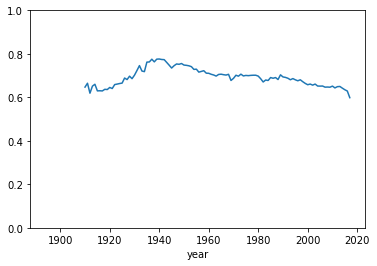

In [20]:
c = cast[cast.year < 2018]
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor / (c.actor + c.actress)).plot(ylim=(0,1))

#### 5. Plot the fraction of supporting roles (n = 2) for actors over time

<AxesSubplot:xlabel='year'>

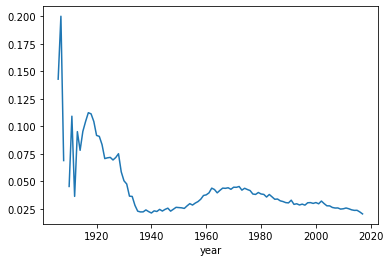

In [25]:
c = cast[(cast.year < 2018) & (cast.type == 'actor')]
two = c[c.n == 2]
c = c.groupby(['year']).size()
two = two.groupby(['year']).size()
(two / c).plot()

In [32]:
cast[(cast.year == 2013) & (cast.type == 'actor')].groupby('n').size()

n
1.0      2659
2.0      1934
3.0      2024
4.0      1878
5.0      1839
         ... 
317.0       1
318.0       1
321.0       1
322.0       1
327.0       1
Length: 273, dtype: int64

#### 6. Plot the fraction of roles n = 1,2, or 3 over time. Each should be a separate line

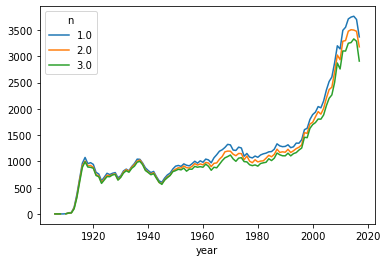

In [37]:
c = cast[(cast.n < 4) & (cast.year < 2018)]
c = c.groupby(['year', 'n']).size()
c.unstack('n').plot();

#### 7. When are Tom Cruise movies typically released (month)? 

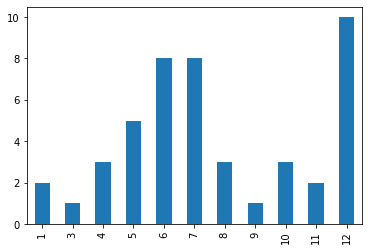

In [47]:
usa = release[release.country == 'USA']
c = cast
c = c[c.name == 'Tom Cruise']
merged = c.merge(usa).sort_values('date')
merged.date.dt.month.value_counts().sort_index().plot(kind='bar');